In [1]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [18]:
import matplotlib.pyplot as plt

#### Importing CSV File

In [2]:
data = pd.read_csv('uber-raw-data-apr14.csv')

In [3]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [4]:
rows,cols = data.shape

In [5]:
rows,cols

(564516, 4)

In [6]:
data.info() # displaying the entries of data present in every column of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
Date/Time    564516 non-null object
Lat          564516 non-null float64
Lon          564516 non-null float64
Base         564516 non-null object
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [8]:
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime) #changing Date/Time column to datetime format

In [9]:
def get_dom(dt):
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom)

In [10]:
data.head()

,Date/Time,Lat,Lon,Base,dom
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1


In [11]:
def get_weekday(dt):
    return dt.weekday_name

In [12]:
data['weekday'] = data['Date/Time'].map(get_weekday)

C:\Users\sachin.b.prakash\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  


In [13]:
data.head(1)

,Date/Time,Lat,Lon,Base,dom,weekday
0,2014-04-01 00:11:00,40.769,-73.9549,B02512,1,Tuesday


In [14]:
def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)

data.tail(2)


,Date/Time,Lat,Lon,Base,dom,weekday,hour
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,Wednesday,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,Wednesday,23


#### Univariate Analysis 

Text(0.5, 1.0, 'Frequency by DoM - Uber - Apr 2014')

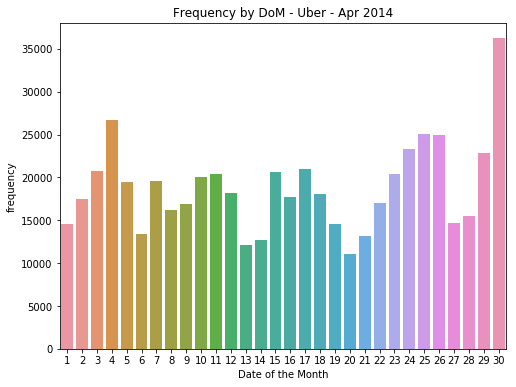

In [47]:
plt.figure(figsize=(8,6))
sns.countplot(data['dom'])

xlabel('Date of the Month')

ylabel('frequency')

title('Frequency by DoM - Uber - Apr 2014')

Text(0.5, 1.0, 'Frequency by Weekday - Uber ')

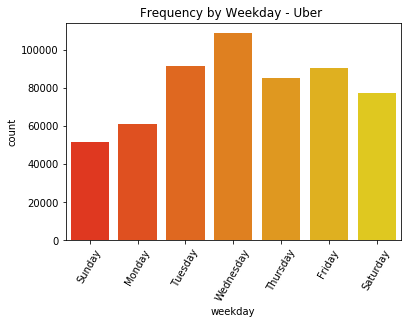

In [53]:
sns.countplot(data.weekday,order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],palette='autumn')
xticks(rotation=60)

title('Frequency by Weekday - Uber ')

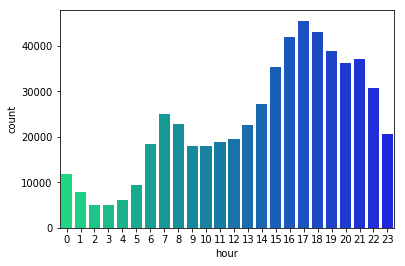

In [71]:
sns.countplot(data.hour,palette='winter_r')

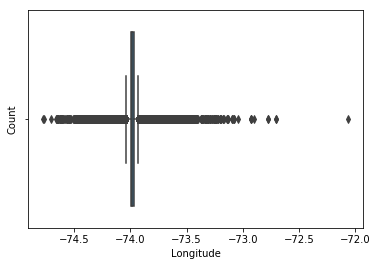

In [89]:

sns.boxplot(x=data['Lon'])
ylabel('Count')
xlabel('Longitude');

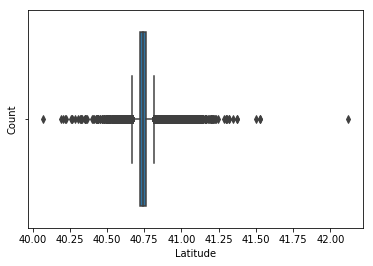

In [90]:

sns.boxplot(x=data['Lat'])
ylabel('Count')
xlabel('Latitude');

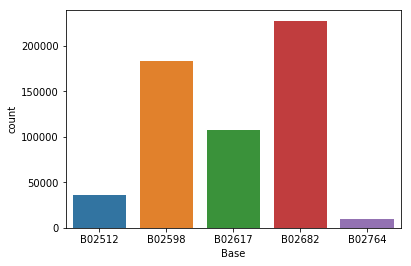

In [64]:
sns.countplot(data['Base'])

''

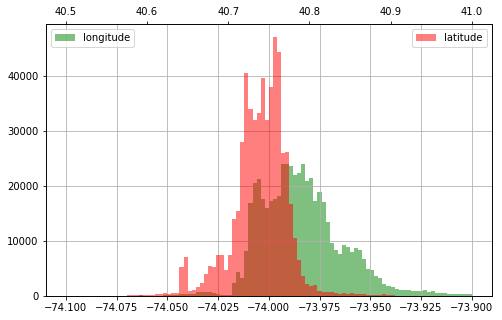

In [69]:
plt.figure(figsize=(8,5))
hist(data['Lon'], bins=100, range = (-74.1, -73.9), color='g', alpha=.5, label = 'longitude')
grid()
legend(loc='upper left')
twiny()
hist(data['Lat'], bins=100, range = (40.5, 41), color='r', alpha=.5, label = 'latitude')
legend(loc='best')
;

In [76]:
def count_rows(rows):
    return len(rows)

# function for counting rows of different columns

In [77]:

weekday_hour = data.groupby('weekday hour'.split()).apply(count_rows).unstack()

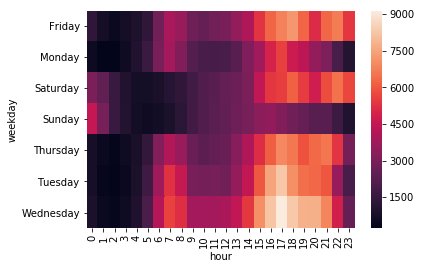

In [79]:
sns.heatmap(weekday_hour)

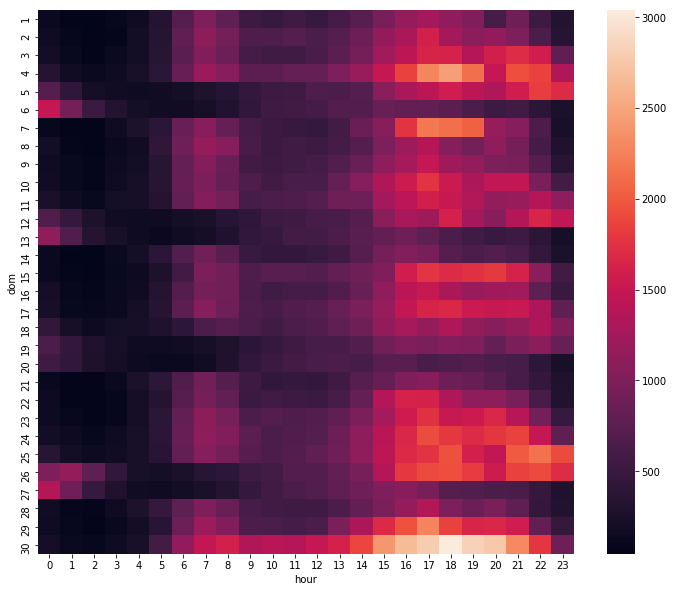

In [85]:
plt.figure(figsize=(12,10))
dom_hour = data.groupby('dom hour'.split()).apply(count_rows).unstack()
sns.heatmap(dom_hour)
